<a href="https://colab.research.google.com/github/ruthwick-2484/Aiml_2303A52484/blob/main/AIML_assg_9_2484.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Required Libraries
Import necessary libraries for data manipulation, visualization, model training, and evaluation.

In [ ]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 2. Data Loading and Exploratory Analysis
Load the dataset, check feature types, generate summary statistics, and perform initial EDA.

In [ ]:
# Step 2: Load and Explore the Dataset
# Load the dataset into a DataFrame
df = pd.read_csv("/content/loan_data.csv")  # Replace with your file path

In [ ]:
# Check data types of each feature
print("Data Types:\n", df.dtypes)

Data Types:
 credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


In [ ]:
# Generate a summary of the dataset
print("\nSummary Statistics:")
print(df.describe(percentiles=[.25, .5, .75, .9]))


Summary Statistics:
       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
90%         1.000000     0.156500   659.370000       11.675457    22.000000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04 

In [ ]:
# List names of columns/features
print("\nFeature Names:", df.columns.tolist())


Feature Names: ['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']


In [ ]:
# Display count of credit approvals
print("\nCount of Credit Approvals (credit.policy):")
print(df['credit.policy'].value_counts())


Count of Credit Approvals (credit.policy):
credit.policy
1    7710
0    1868
Name: count, dtype: int64


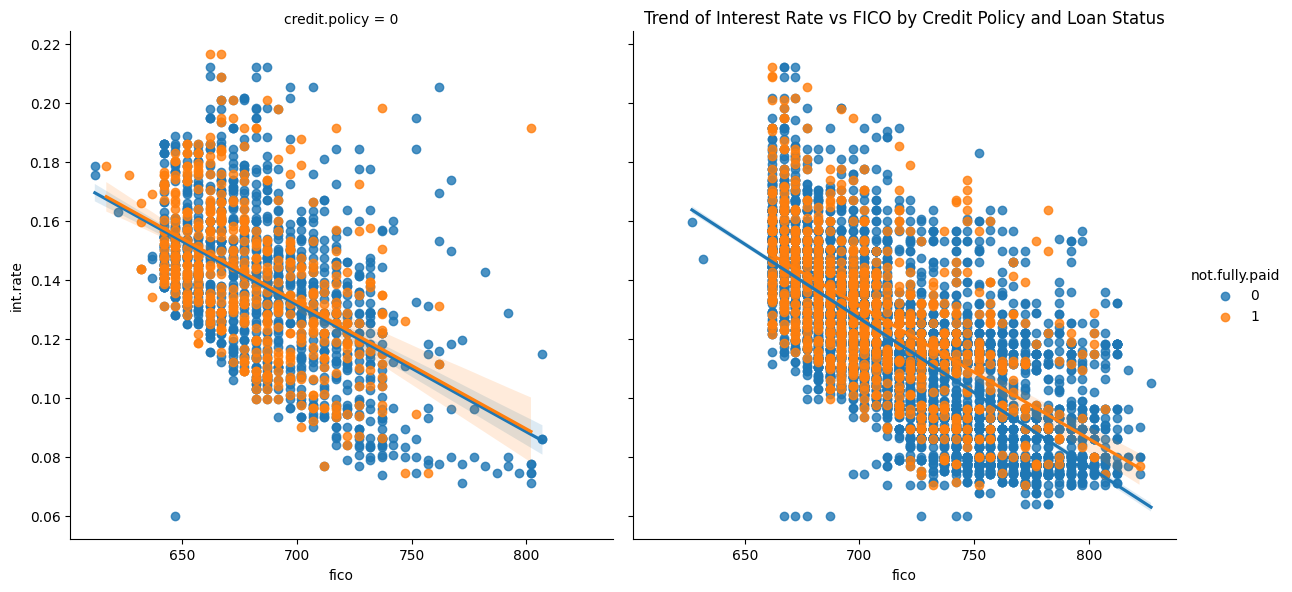

In [ ]:
# Generate a Seaborn lmplot to verify trends between 'not.fully.paid' and 'credit.policy'
sns.lmplot(x='fico', y='int.rate', hue='not.fully.paid', col='credit.policy', data=df, height=6, aspect=1)
plt.title("Trend of Interest Rate vs FICO by Credit Policy and Loan Status")
plt.show()

# 3. Categorize Features
Use pd.get_dummies() to convert categorical variables into a format suitable for model training, particularly the purpose feature.

In [ ]:
# Step 3: Categorize Categorical Features
# Convert categorical 'purpose' feature into dummy/indicator variables
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)  # Dropping the first dummy to avoid multicollinearity

# 4. Model Training and Data Splitting
Split the data into training and test sets, then train a Random Forest Classifier on the training data.

In [ ]:
# Step 4: Model Training and Data Splitting
# Define features (X) and target variable (y)
X = df.drop(columns=['not.fully.paid'])  # Features
y = df['not.fully.paid']  # Target variable

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 5. Evaluate Model Quality
Evaluate the model's performance using a confusion matrix and classification report.

In [ ]:
# Step 5: Evaluate Model Quality
# Predict on test data
y_pred = rf_model.predict(X_test)

In [ ]:
# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[2396   12]
 [ 459    7]]


In [ ]:
# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.37      0.02      0.03       466

    accuracy                           0.84      2874
   macro avg       0.60      0.51      0.47      2874
weighted avg       0.76      0.84      0.77      2874

